In [1]:
from pycaret.regression import *
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pls
import seaborn as sns

In [2]:

data=pd.read_csv('data_house_cleaned.csv')

In [12]:
import pandas as pd

data=pd.read_csv('data_house_cleaned.csv')
# Mengubah kolom 'price' menjadi dalam hitungan miliar
data['price_in_billion'] = data['price'] / 1_000_000_000# Menampilkan beberapa baris untuk memastikan hasil
data['listing_floorarea_2'] = data['listing_floorarea_2'] /1_000_000



In [13]:
data.to_csv('data_house_cleaned.csv', index=False)

In [3]:
data.head()

,listing-location,price,bed,bath,listing-floorarea,listing_floorarea_2,price_in_billion
0,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,20.720721,6.90
1,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,12.747875,4.50
2,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,30.859375,3.95
3,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,18.333333,3.30
4,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,27.777778,3.50


In [4]:
data.isnull().sum()

listing-location       0
price                  0
bed                    0
bath                   0
listing-floorarea      0
listing_floorarea_2    0
price_in_billion       0
dtype: int64

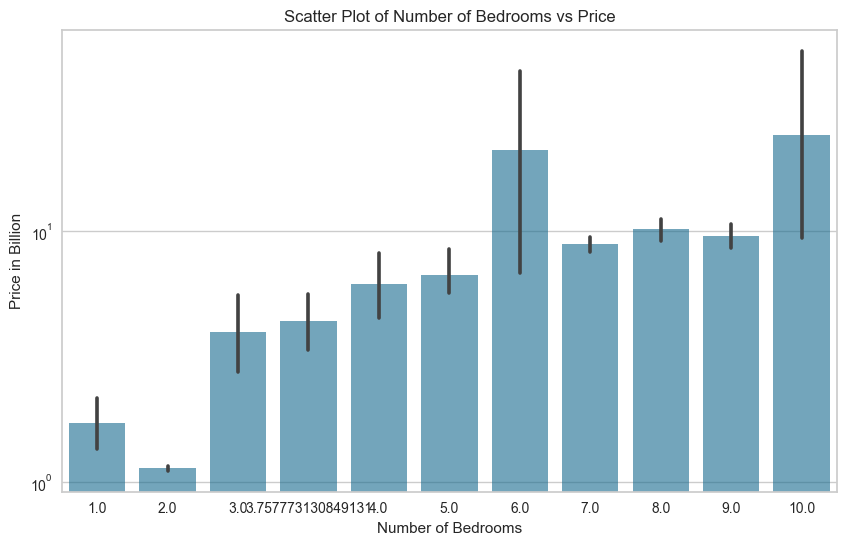

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='bed', y='price_in_billion',data=data, alpha=0.6)
plt.yscale('log')  # Menggunakan skala logaritmik untuk harga jika distribusinya sangat skewed
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Billion')
plt.title('Scatter Plot of Number of Bedrooms vs Price')
plt.show()


In [3]:
from pycaret.regression import setup, compare_models

# Setup PyCaret environment
exp_reg = setup(data=data, 
                target='price_in_billion', 
                ignore_features=['nav-link href'], # Kolom yang akan diabaikan
                categorical_features=['listing-location'], # Menangani kolom kategorikal
                normalize=True,
                normalize_method='minmax', # Normalisasi data
                session_id=123) # Memastikan hasil yang konsisten# Membandingkan model yang terbaik



,Description,Value
0,Session id,123
1,Target,price_in_billion
2,Target type,Regression
3,Original data shape,"(29309, 7)"
4,Transformed data shape,"(29309, 7)"
5,Transformed train set shape,"(20516, 7)"
6,Transformed test set shape,"(8793, 7)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,1


In [4]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2.5540
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1860
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.2700
gbr,Gradient Boosting Regressor,0.8102,3090.1427,25.3512,0.9411,0.0195,0.1349,2.1260
dt,Decision Tree Regressor,0.8799,4288.5448,32.8710,0.8922,0.0215,0.0162,0.1970
rf,Random Forest Regressor,0.8160,3262.4335,29.7358,0.8762,0.0240,0.0265,4.7920
huber,Huber Regressor,1.4595,765.6270,20.4074,0.8678,0.2400,1.3770,0.4880
et,Extra Trees Regressor,0.6848,2376.5908,26.7826,0.7485,0.0309,0.0565,1.8570
knn,K Neighbors Regressor,1.7856,5426.2349,42.9770,0.7303,0.1786,1.1924,0.2700
ada,AdaBoost Regressor,3.3150,2104.7761,27.1457,0.7119,0.6580,6.6962,0.4190


In [8]:
result=pull()
result

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.623
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.223
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.121
gbr,Gradient Boosting Regressor,0.8102,3090.1427,25.3512,0.9411,0.0195,0.1349,2.051
dt,Decision Tree Regressor,0.8799,4288.5448,32.8710,0.8922,0.0215,0.0162,0.234
rf,Random Forest Regressor,0.8160,3262.4335,29.7358,0.8762,0.0240,0.0265,4.082
huber,Huber Regressor,1.4595,765.6270,20.4074,0.8678,0.2400,1.3770,0.401
et,Extra Trees Regressor,0.6848,2376.5908,26.7826,0.7485,0.0309,0.0565,1.506
knn,K Neighbors Regressor,1.7856,5426.2349,42.9770,0.7303,0.1786,1.1924,0.279
ada,AdaBoost Regressor,3.3150,2104.7761,27.1457,0.7119,0.6580,6.6962,0.421


In [5]:
from pycaret.regression import *
gbr_model=create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0546,0.0104,0.1019,0.9992,0.0153,0.1050
1,0.0556,0.0117,0.1080,1.0000,0.0156,0.1132
2,0.0560,0.0088,0.0940,0.9996,0.0161,0.0979
3,1.2570,780.6979,27.9410,0.8820,0.0272,0.1549
4,0.2823,56.8621,7.5407,0.9478,0.0248,0.2378
5,0.0576,0.0131,0.1144,1.0000,0.0160,0.1723
6,0.0537,0.0083,0.0909,1.0000,0.0157,0.1064
7,1.2062,2704.5686,52.0055,0.9088,0.0186,0.2030
8,0.0567,0.0120,0.1096,1.0000,0.0161,0.0911


In [6]:
# Membuat grid hyperparameter custom (opsional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Menggunakan GridSearchCV dalam tune_model
tuned_model = tune_model(gbr_model, 
                         search_library='scikit-learn', 
                         search_algorithm='grid', 
                         custom_grid=param_grid)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


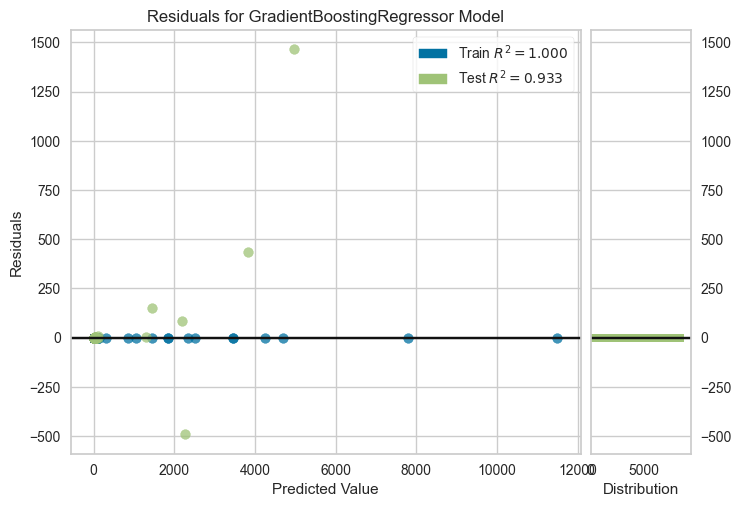

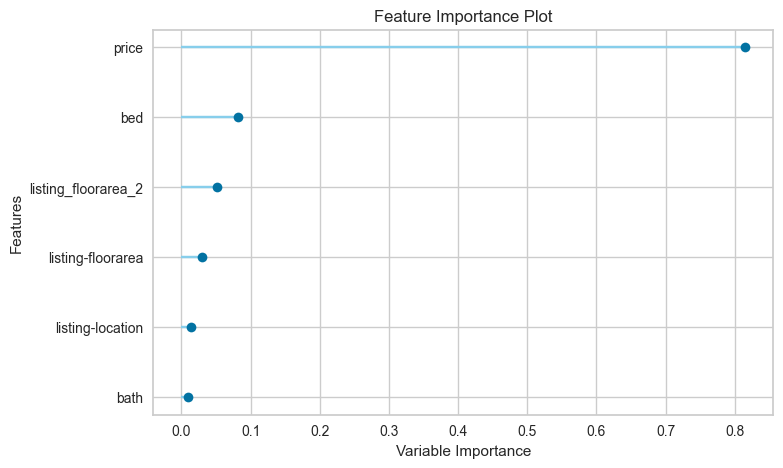

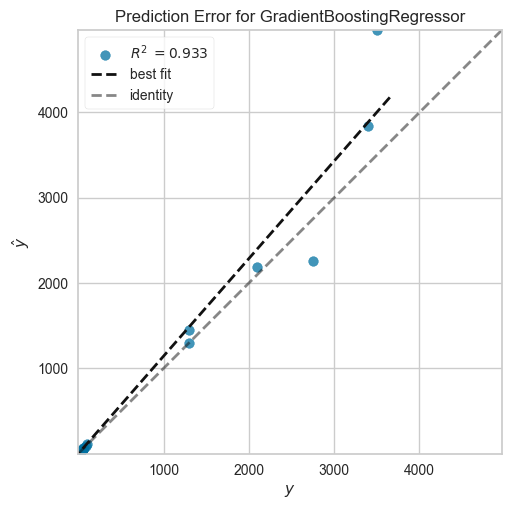

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.2
loss,squared_error
max_depth,4
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


In [71]:
plot_model(tuned_model, plot='residuals')
plot_model(tuned_model, plot='feature')
plot_model(tuned_model, plot='error')
plot_model(tuned_model, plot='learning')
plot_model(tuned_model, plot='manifold')




In [60]:
data.head()

,listing-location,price,bed,bath,listing-floorarea,listing_floorarea_2,price_in_billion
0,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,20.720721,6.90
1,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,12.747875,4.50
2,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,30.859375,3.95
3,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,18.333333,3.30
4,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,27.777778,3.50


In [29]:
from pycaret.regression import save_model
save_model(tuned_model,'price_house_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['price', 'bed', 'bath',
                                              'listing-floorarea',
                                              'listing_floorarea_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['listing-location'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(i...=['listing-location'],
                                     transformer=TargetEncoder(cols=['listing-location'],
                                                               handle_missing='return_nan'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('clean_column_names',
                  TransformerWrapper(trans

In [30]:
create_app(tuned_model)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [7]:
from sklearn.model_selection import train_test_split
# Splitting the data into features and target
X = data.drop(columns=['price_in_billion'])
y = data['price_in_billion']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from pycaret.regression import load_model
load_model=load_model('price_house_pycaret')

Transformation Pipeline and Model Successfully Loaded


In [18]:
# Misalkan 'new_data' adalah DataFrame baru yang ingin Anda prediksi
from pycaret.regression import predict_model

# Membuat prediksi
prediction_price_in_bililion = predict_model(load_model, data=X_test)
print(prediction_price_in_bililion)

                                        listing-location         price  bed  \
23568  Cluster Carissa, Serpong Utara, Tangerang Sela...  1.800000e+09  5.0   
10621                     BSD, Tangerang Selatan, Banten  1.600000e+09  4.0   
2201   Jalan boulevard Navapark bsd city, BSD, Tanger...  1.600000e+10  6.0   
1433   Nara Village, Jalan Proklamasi, Gading Serpong...  4.100000e+09  4.0   
4120                  Bintaro, Tangerang Selatan, Banten  3.100000e+09  5.0   
...                                                  ...           ...  ...   
15170  Perumahan Cendana Green Village, Setu, Tangera...  5.300000e+08  2.0   
14897  Medang, Kabupaten Tangerang, Banten, BSD, Tang...  2.200400e+09  3.0   
9285                  Bintaro, Tangerang Selatan, Banten  1.500000e+09  4.0   
23368  Virginia Village Gading Serpong, Gading Serpon...  1.300000e+09  1.0   
6545                  Bintaro, Tangerang Selatan, Banten  2.200000e+09  4.0   

       bath  listing-floorarea  listing_floorarea_2

In [34]:
prediction_price_in_bililion.head(20)

,listing-location,price,bed,bath,listing-floorarea,listing_floorarea_2,prediction_label
23568,"Cluster Carissa, Serpong Utara, Tangerang Sela...",1.800000e+09,5.0,3.0,180,18.750000,1.800497
10621,"BSD, Tangerang Selatan, Banten",1.600000e+09,4.0,2.0,130,11.851852,1.599438
2201,"Jalan boulevard Navapark bsd city, BSD, Tanger...",1.600000e+10,6.0,8.0,463,53.333332,16.028943
1433,"Nara Village, Jalan Proklamasi, Gading Serpong...",4.100000e+09,4.0,4.0,163,27.516779,4.099041
4120,"Bintaro, Tangerang Selatan, Banten",3.100000e+09,5.0,4.0,138,25.833332,3.099784
15828,"Bintaro, Tangerang Selatan, Banten",1.490000e+09,2.0,1.0,60,17.738094,1.495249
19125,"pondok Pucung sektor 9 Bintaro, Bintaro, Tange...",2.660000e+09,4.0,3.0,294,19.275362,2.655112
10168,"Jl Siliwangi, Pamulang, Tangsel, Pamulang, Tan...",8.620000e+08,3.0,2.0,72,13.903226,0.862449
1246,"Jalan raya Puspitek Serpong, Pamulang, Tangera...",7.000000e+08,3.0,2.0,36,11.666667,0.699068
22169,"BSD, Tangerang Selatan, Banten",4.500000e+09,5.0,6.0,300,22.500000,4.498793


In [45]:
y_test.head(20)

23568     1.800000
10621     1.600000
2201     16.000000
1433      4.100000
4120      3.100000
15828     1.490000
19125     2.660000
10168     0.862000
1246      0.700000
22169     4.500000
12643     3.300000
18353     7.950000
6235      4.900000
10339     2.400000
20935     3.200000
21824     0.666111
4903      3.200000
2617      0.900000
16425     2.300000
21948     2.450000
Name: price_in_billion, dtype: float64

In [33]:
import numpy as np

# Misalkan df adalah DataFrame Anda
prediction_label_array = prediction_price_in_bililion['prediction_label'].to_numpy()

# Sekarang, prediction_label_array adalah numpy array


In [34]:
prediction_label_array

array([ 1.80049723,  1.59943845, 16.02894279, ...,  1.50189479,
        1.29876999,  2.20082495])

In [48]:
import pandas as pd

y_pred = pd.Series(prediction_label_array, index=y_test.index)


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Misalkan y_test adalah nilai aktual dan y_pred adalah prediksi dari model# y_test dan y_pred adalah array atau list dari nilai-nilai tersebut# Mengatur ukuran figure lebih kecil
plt.figure(figsize=(12, 6))

# Membuat garis untuk nilai aktual
sns.lineplot(x=np.arange(len(y_test)), y=y_test, marker='o', label='Actual', color='blue', linewidth=12)

# Membuat garis untuk nilai prediksi
sns.lineplot(x=np.arange(len(y_pred)), y=y_pred, marker='o', label='Predicted', color='red', linestyle='-', linewidth=3)

# Menggunakan skala logaritmik pada sumbu Y
plt.yscale('log')

# Menambahkan grid untuk kemudahan membaca
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Menambahkan judul dan label sumbu
plt.title('Comparison of Actual vs Predicted Values (Log Scale)', fontsize=14)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Values (Log Scale)', fontsize=12)

# Menambahkan legenda di posisi yang terbaik
plt.legend(loc='best', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()


AttributeError: module 'seaborn' has no attribute 'suplot'

<Figure size 1200x600 with 0 Axes>